A notebook to fit simulated light curves, spanning the true length of a light curve, but sampled at cadences corresponding to individual surveys. The errors are median errors of each light curve, so each light curve has different errors. 

Directories with light curves : 
    
    SDSS_CRTS_PTF_PS1_sim/median_err/sdss/lc/ 
    SDSS_CRTS_PTF_PS1_sim/median_err/sdss-crts/lc/ 
    SDSS_CRTS_PTF_PS1_sim/median_err/sdss-crts-ptf/lc/ 
    SDSS_CRTS_PTF_PS1_sim/median_err/sdss-crts-ptf-ps1/lc/ 

In [2]:
import os 
import subprocess
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.table import join
import numpy as np
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18



Make the process.dat file ... 

In [59]:
surveys = ['sdss-crts-ptf-ps1', 'sdss-crts-ptf', 'sdss-crts', 'sdss']
simDir = 'SDSS_CRTS_PTF_PS1_sim/median_err/'
for survey in surveys : 
    print(survey)
    lcDir = simDir + survey + '/lc/'
    lcNames=  os.listdir(lcDir)
    lcNpoints = []
    
    # fing the length of each light curve 
    for fn in lcNames :
        with open(lcDir+fn) as f : 
            length = sum(1 for line in f if line.strip()) 
            lcNpoints.append(length)
    lcNpoints = np.asarray(lcNpoints)      
    
    # Make a input.filter file, saying which filter we are using (1 = u,  5 = z )
    f = open(simDir+survey+'/'+"input.filter", "w+")
    f.write("1")
    f.close()

    # Make a process.dat file ...
    f= open(simDir+survey+'/'+"process.dat","w+")

    # write the header
    Nlightcurves =  len(lcNames)
    f.write(str(Nlightcurves)+" #ndata RA Dec redshift Absi fname \n")
    # write the file lines 
    for i in range(Nlightcurves):
         f.write(str(lcNpoints[i]) + "   0       0       1     -25  " +\
                 "'"+"lc/"+lcNames[i]+ "'\n")
    # close the file 
    f.close()

Run in each directory :  
    
    cd SDSS_CRTS_PTF_PS1_sim/median_err/sdss/ 
    ./qso.out  
    
    cd SDSS_CRTS_PTF_PS1_sim/median_err/sdss-crts/ 
    ./qso.out  
    
    cd SDSS_CRTS_PTF_PS1_sim/median_err/sdss-crts-ptf/ 
    ./qso.out 
    
    cd SDSS_CRTS_PTF_PS1_sim/median_err/sdss-crts-ptf-ps1/ 
    ./qso.out 

Take the outcome and combine on a single plot  : 

In [21]:
surveys = ['sdss-crts-ptf-ps1', 'sdss-crts-ptf', 'sdss-crts', 'sdss']
simDir = 'SDSS_CRTS_PTF_PS1_sim/median_err/'
results = {}
for survey in surveys : 
    results[survey] = {}
    resDir = simDir+survey+'/'
    fit_results = Table.read(resDir+'fort.40', format='ascii', 
                             names=['edge','mu', 'maxlike','minchi','minchired', 'log_sigma' ,
     'log_sig_err_lo','log_sig_err_hi','log_tau','log_tau_err_lo','log_tau_err_hi',
     'log_tau_med','log_sig_med', 'fname']  )
    print('+'+survey, len(fit_results))
    results[survey]['sigma'] = np.power(10, fit_results['log_sigma'].data)
    results[survey]['tau'] = np.power(10, fit_results['log_tau'].data)
    results[survey]['lcname'] = fit_results['fname'].data

# propagate results to Tables that can be easily joined 
s = {}
for survey in surveys : 
    s[survey]= Table(data=[results[survey]['lcname'], 
                           results[survey]['tau'],
                           results[survey]['sigma']],
                     names=['lcname', 'tau', 'sigma'])
    
# join all results on lcname 
sa = join(s[surveys[0]], s[surveys[1]], keys = 'lcname', table_names=[surveys[0],
                                                                surveys[1]])
sb = join(s[surveys[2]], s[surveys[3]], keys = 'lcname', table_names=[surveys[2],
                                                                surveys[3]])
ss = join(sa, sb, keys='lcname')
print('---------')
print('=combined ', len(ss))

+sdss-crts-ptf-ps1 6444
+sdss-crts-ptf 6444
+sdss-crts 6444


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in power
  if sys.path[0] == '':


+sdss 6444
---------
=combined  6444


In [6]:
ss

lcname,tau_sdss-crts-ptf-ps1,sigma_sdss-crts-ptf-ps1,tau_sdss-crts-ptf,sigma_sdss-crts-ptf,tau_sdss-crts,sigma_sdss-crts,tau_sdss,sigma_sdss
str15,float64,float64,float64,float64,float64,float64,float64,float64
lc/1001265F.txt,1824.3787289,0.125390605629,1617.76337844,0.130965830109,1737.44473759,0.127745614572,441.283815927,0.111159606314
lc/1001531F.txt,25118.8643151,0.1,2033.2276169,0.107130220797,25118.8643151,0.11220184543,25118.8643151,0.11220184543
lc/1001793F.txt,1088.48387574,0.108272209631,1110.47810474,0.108507560587,1155.89663651,0.104775079733,9858.52631449,0.0573947277284
lc/1002162F.txt,25118.8643151,0.125892541179,25118.8643151,0.125892541179,25118.8643151,0.125892541179,488.621980869,0.143994200223
lc/1002453F.txt,762.105331756,0.128757934134,731.945929621,0.133713420943,680.170825741,0.137045569518,25118.8643151,0.158489319246
lc/100286F.txt,1324.3201895,0.11879933237,1277.37084647,0.119751786198,1106.29767582,0.122052871111,907.137248223,0.119020288872
lc/1003180F.txt,1339.34049518,0.102600151014,1366.284055,0.100666970725,1770.31683767,0.101852571916,9821.11960356,0.111297138867
lc/1003235F.txt,578.748662015,0.121055074689,556.888179937,0.120617688095,525.851358227,0.128055725211,25118.8643151,0.11220184543
lc/1003323F.txt,622.459357326,0.124624663879,581.296890748,0.127482038665,577.194255305,0.128034497108,1008.32143601,0.109306251234


Plot the combined results : 

In [7]:
0.2 / np.sqrt(2)

0.1414213562373095

sdss  tau_fit/tau_in  median  0.770733362903 , bias  -0.116384795735
sdss-crts  tau_fit/tau_in  median  1.1615265875 , bias  0.293794207877
sdss-crts-ptf  tau_fit/tau_in  median  1.18186305086 , bias  0.308823991805
sdss-crts-ptf-ps1  tau_fit/tau_in  median  1.20999382873 , bias  0.339723207538


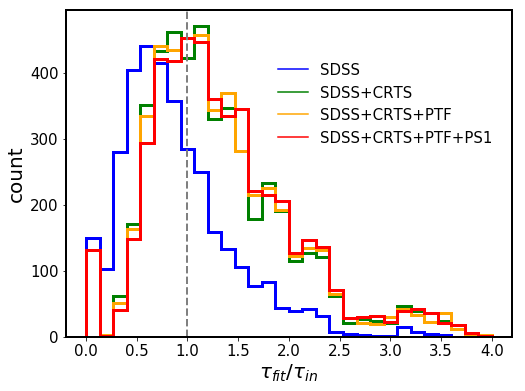

In [25]:
%matplotlib inline
label = ['sdss', 'sdss+crts', 'sdss+crts+ptf', 'sdss+crts+ptf+ps1']
import matplotlib.lines as mlines
tau_in = 575 # days 
SF_inf = 0.2  # mags 
sigma_in = SF_inf / np.sqrt(2)

factor = np.power(10,0.11)
fig,ax = plt.subplots(1,1,figsize=(8,6))
colors= ['blue','green', 'orange',  'red']
ax_legend_handles = []
for i in  range(4):
    survey = label[i].replace('+','-')
    tau_fit =  ss['tau_'+survey]
    x = tau_fit / tau_in
    ax.hist( x , range=[0,4], histtype='step', 
            color=colors[i], lw=3,bins=30)
    x = x[(0<x)*(x<4)]
    print(survey, ' tau_fit/tau_in  median ', np.median(x), ', bias ', np.mean(x)-1)
    line = mlines.Line2D([], [],  color=colors[i], 
                                 label=label[i].upper())
    ax_legend_handles.append(line)
legend_ax = fig.add_axes([0.6, 0.5, 0.29, 0.29])     #  (x0 ,y0  , dx,  dy )  
legend_ax.legend(loc='upper right', handles = ax_legend_handles, frameon=False,
                 fontsize=15,)
legend_ax.axis('off')
ax.axvline(1, lw=2, ls='--', c='grey')
ax.set_xlabel(r'$\tau_{fit} / \tau_{in}$')
ax.set_ylabel('count')
plt.savefig('combined_lc_sampled_tau_FORTRAN.png', bbox_inches='tight')
            



Plot the same for sigma ...

sdss median sigma_fit/sigma_in=  0.805824568039
sdss-crts median sigma_fit/sigma_in=  0.826472680395
sdss-crts-ptf median sigma_fit/sigma_in=  0.825382016449
sdss-crts-ptf-ps1 median sigma_fit/sigma_in=  0.818472331083


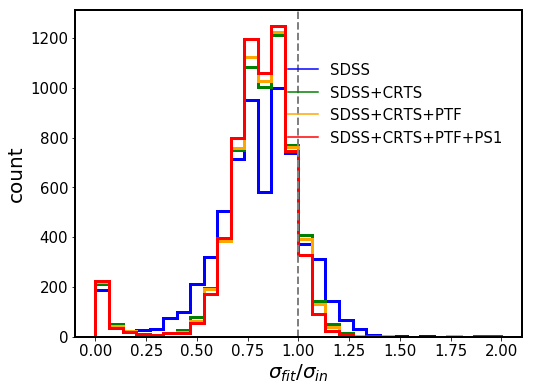

In [27]:
%matplotlib inline
label = ['sdss', 'sdss+crts', 'sdss+crts+ptf', 'sdss+crts+ptf+ps1']
import matplotlib.lines as mlines
tau_in = 575 # days 
SF_inf = 0.2  # mags 
sigma_in = SF_inf / np.sqrt(2)

factor = np.power(10,0.11)
fig,ax = plt.subplots(1,1,figsize=(8,6))
colors= ['blue','green', 'orange',  'red']
ax_legend_handles = []
for i in  range(4):
    survey = label[i].replace('+','-')
    sigma_fit =  ss['sigma_'+survey]
    x = sigma_fit / sigma_in
    ax.hist( x , range=[0,2], histtype='step', 
            color=colors[i], lw=3,bins=30)
    print(survey, 'median sigma_fit/sigma_in= ', np.median(x))
    line = mlines.Line2D([], [],  color=colors[i], 
                                 label=label[i].upper())
    ax_legend_handles.append(line)
legend_ax = fig.add_axes([0.6, 0.5, 0.29, 0.29])     #  (x0 ,y0  , dx,  dy )  
legend_ax.legend(loc='upper right', handles = ax_legend_handles, frameon=False,
                 fontsize=15,)
legend_ax.axis('off')
ax.axvline(1, lw=2, ls='--', c='grey')
ax.set_xlabel(r'$\sigma_{fit} / \sigma_{in}$')
ax.set_ylabel('count')
plt.savefig('combined_lc_sampled_sigma_FORTRAN.png', bbox_inches='tight')
            




In [15]:
ss[:4]

lcname,tau_sdss-crts-ptf-ps1,sigma_sdss-crts-ptf-ps1,tau_sdss-crts-ptf,sigma_sdss-crts-ptf,tau_sdss-crts,sigma_sdss-crts,tau_sdss,sigma_sdss
str15,float64,float64,float64,float64,float64,float64,float64,float64
lc/1001265F.txt,1824.3787289,0.125390605629,1617.76337844,0.130965830109,1737.44473759,0.127745614572,441.283815927,0.111159606314
lc/1001531F.txt,25118.8643151,0.1,2033.2276169,0.107130220797,25118.8643151,0.11220184543,25118.8643151,0.11220184543
lc/1001793F.txt,1088.48387574,0.108272209631,1110.47810474,0.108507560587,1155.89663651,0.104775079733,9858.52631449,0.0573947277284
lc/1002162F.txt,25118.8643151,0.125892541179,25118.8643151,0.125892541179,25118.8643151,0.125892541179,488.621980869,0.143994200223


(array([  2.39000000e+02,   2.20000000e+01,   8.20000000e+01,
          9.87000000e+02,   2.38600000e+03,   1.80100000e+03,
          1.62000000e+02,   8.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e-10,   2.51188644e-02,   5.02377287e-02,
          7.53565930e-02,   1.00475457e-01,   1.25594322e-01,
          1.50713186e-01,   1.75832050e-01,   2.00950915e-01,
          2.26069779e-01,   2.51188643e-01]),
 <a list of 10 Patch objects>)

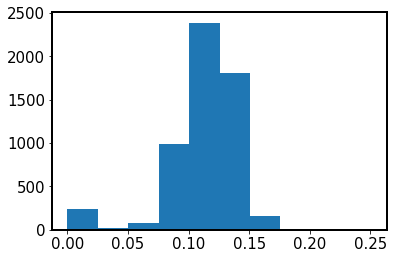

In [16]:
plt.hist(ss['sigma_sdss-crts-ptf'])

Also print sigma_hat, since it should be less biased ... 

sdss median fit / in =  0.471158700528
sdss-crts median fit / in =  0.659850689356
sdss-crts-ptf median fit / in =  0.660170974719
sdss-crts-ptf-ps1 median fit / in =  0.644201044305


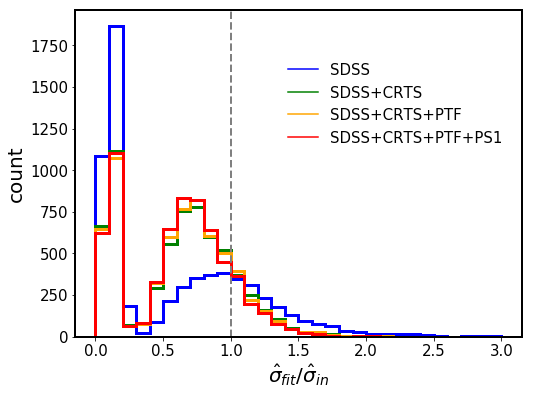

In [29]:
%matplotlib inline
label = ['sdss', 'sdss+crts', 'sdss+crts+ptf', 'sdss+crts+ptf+ps1']
import matplotlib.lines as mlines
tau_in = 575 # days 
SF_inf = 0.2  # mags 
sigma_in = SF_inf / np.sqrt(2)
sigma_hat_in = SF_inf / np.sqrt(tau_in)

factor = np.power(10,0.11)
fig,ax = plt.subplots(1,1,figsize=(8,6))
colors= ['blue','green', 'orange',  'red']
ax_legend_handles = []
for i in  range(4):
    survey = label[i].replace('+','-')
    sigma_fit =  ss['sigma_'+survey]
    tau_fit =  ss['tau_'+survey]
    SF_inf_fit = sigma_fit * np.sqrt(2)
    sigma_hat_fit = SF_inf_fit / np.sqrt(tau_fit)
    x = sigma_hat_fit / sigma_hat_in
    ax.hist( x , range=[0,3], histtype='step', 
            color=colors[i], lw=3,bins=30)
    print(survey, 'median fit / in = ', np.median(x))
    line = mlines.Line2D([], [],  color=colors[i], 
                                 label=label[i].upper())
    ax_legend_handles.append(line)
legend_ax = fig.add_axes([0.6, 0.5, 0.29, 0.29])     #  (x0 ,y0  , dx,  dy )  
legend_ax.legend(loc='upper right', handles = ax_legend_handles, frameon=False,
                 fontsize=15,)
legend_ax.axis('off')
ax.axvline(1, lw=2, ls='--', c='grey')
ax.set_xlabel(r'$\hat{\sigma}_{fit} / \hat{\sigma}_{in}$')
ax.set_ylabel('count')
plt.savefig('combined_lc_sampled_sigma_hat_FORTRAN.png', bbox_inches='tight')
            





I'm quite suprised here that plotting sigma_hat is obviously unbiased when using only SDSS data,  but as we add more data, we actually introduce bias! This could be also due to different errors in each light curve - too many variables. For this reason I'll also try using single error for all light curves ,  to eliminate error as a possible problem, and consider only the sparse light curve length ( the simulated LC for Kozlowski's Fig.2 used only N=60 pts for SDSS cadence, or N=445 for random OGLE obs , both with baseline of 8 years ) ')